# <b style = "color:blue"> MACHINE LEARNING SYSTEM FOR CAR PRICE PREDICTION </b>

# CODE IMPLEMENTATION 
### GODSPOWER UYANGA (GROUP LEADER)
# <b style = "color: blue" > A MACHINE LEARNING PROJECT EXECUTED BY GROUP14
</b>

## Importing Dependencies

In [108]:
 # We Need To Import All The Libraries We Will Use On This Project

# Data Wranngling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Stage 1.  <b style = "color:blue"> Data Collection</b>

In [40]:
# Here Lets Import Our Car Data

car_data = pd.read_csv("Car_sales.csv")

# Stage 2.  <b style = "color:blue"> EXPLORATORY DATA ANALYSIS (EDA) </b>

### Perusing The First 5 Rows Of The Data

In [4]:
# Lets Check The First 5 Rows Of Our Data
print('---------------  Here Is The First 5 Rows Of Our Car Data  ---------------------\n')
car_data.head()

---------------  Here Is The First 5 Rows Of Our Car Data  ---------------------



,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Perusing The Last 5 Rows Of Our Data

In [116]:
# Going Through The Last 5 Rows Of Our Data
print('----------------    Here is The Last 5 Rows Of Our Car Data      ----------------\n')
car_data.tail()

----------------    Here is The Last 5 Rows Of Our Car Data      ----------------



,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


###  Knowing The Shape Of The Data

In [7]:
# Lets Check The Shape Of Our Data
print('---------------- The Rows And Columns Of Our Car Data Is Shown Below  ------------------\n')
print(f" Our Dataset Has {car_data.shape} Rows And Columns")

---------------- The Rows And Columns Of Our Car Data Is Shown Below  ------------------

 Our Dataset Has (157, 16) Rows And Columns


### Analyzing And Idenitifying Missing Values

In [6]:
#Lets Check The Number Of Missing Values In Our Data
print("--------------    The Sum Of Our Missing Values Are Shown Below In Ascending Order -------------------------------\n")
car_data.isnull().sum().sort_values(ascending = True)

--------------    The Sum Of Our Missing Values Are Shown Below In Ascending Order -------------------------------



Manufacturer            0
Model                   0
Sales_in_thousands      0
Vehicle_type            0
Latest_Launch           0
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Fuel_capacity           1
Price_in_thousands      2
Curb_weight             2
Power_perf_factor       2
Fuel_efficiency         3
__year_resale_value    36
dtype: int64

### Descriptive Statistical Summary Of The Data

In [8]:
# Lets Check The Statistical Description Of Our Data
print('--------------   Below Is The Statistical Description Of Our Car Data   -------------------\n')
car_data.describe()

--------------   Below Is The Statistical Description Of Our Car Data   -------------------



,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Checking For Data Types Of Each Columns

In [5]:
# Getting More Informations about the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

### Using Correlation Matrix To Peruse The Correlation Of Our Car Data

In [9]:
# Correlation Matrix 
print("---------------Correlation Matrix To Show The Correlation Of Our Car Data ---------------------\n")
Correlation_Matrix = car_data.corr()
Correlation_Matrix

---------------Correlation Matrix To Show The Correlation Of Our Car Data ---------------------



,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.279034,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,-0.223252
__year_resale_value,-0.279034,1.000000,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880,0.827123
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,0.897945
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.358179,-0.052270,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.140918,0.178767,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.254980,0.026548,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.008628,0.361557,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184


## Data Visualization

### Visualizing The Skewness Of Our Car Data

---------   The Below Visual Shows The Skewness Distribution Of Our Car Data --------------



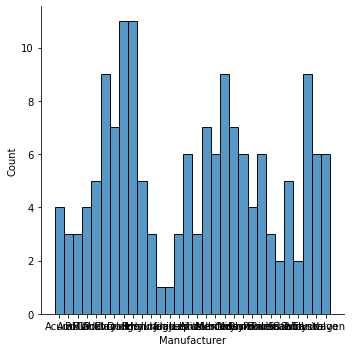

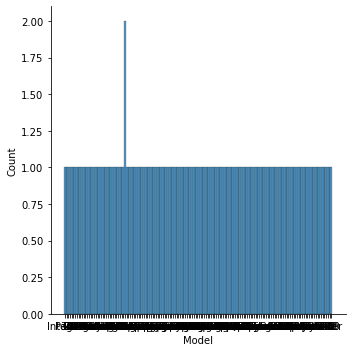

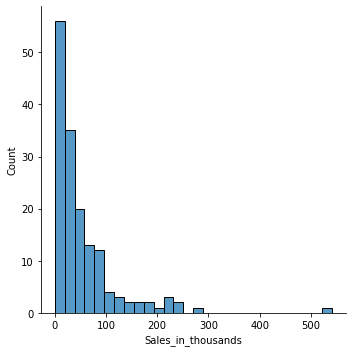

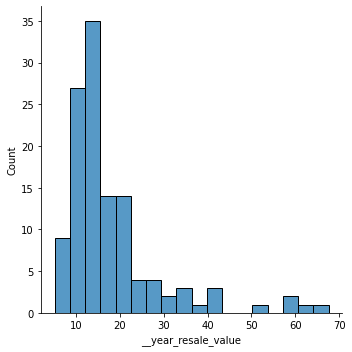

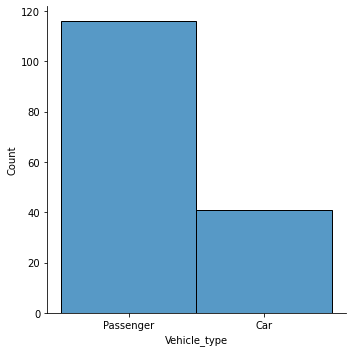

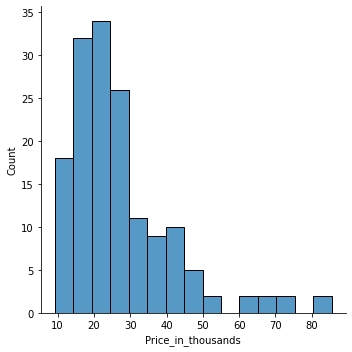

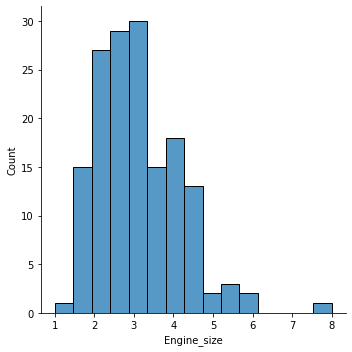

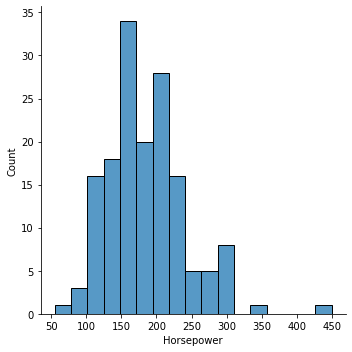

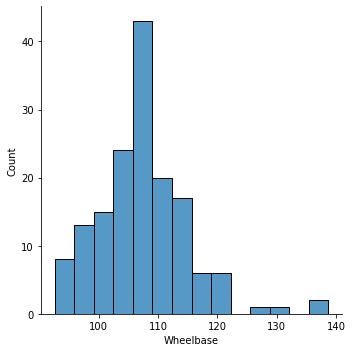

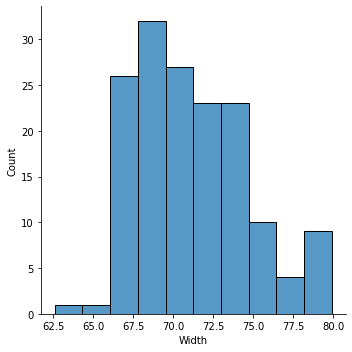

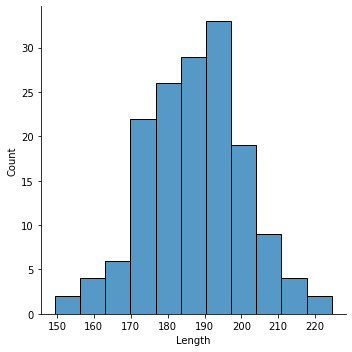

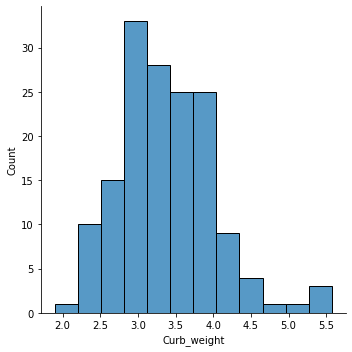

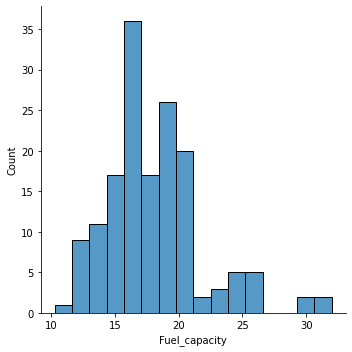

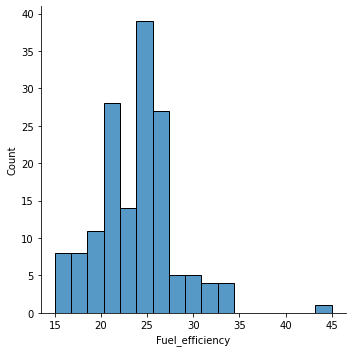

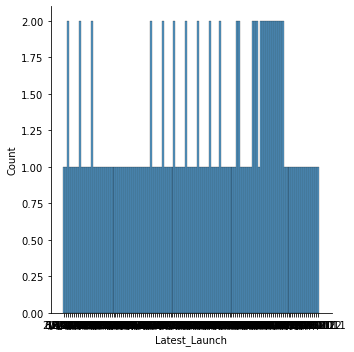

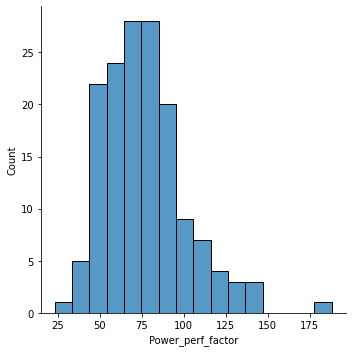

In [10]:
print("---------   The Below Visual Shows The Skewness Distribution Of Our Car Data --------------\n")

for Column in car_data:
    sns.displot(x = Column, data = car_data)

### Using Pairplot To Visualize The Relationships Between Variables In Our Car Data

-----   The Pairplot Below Shows The Relationships Between Variables In Our Car Data ----------



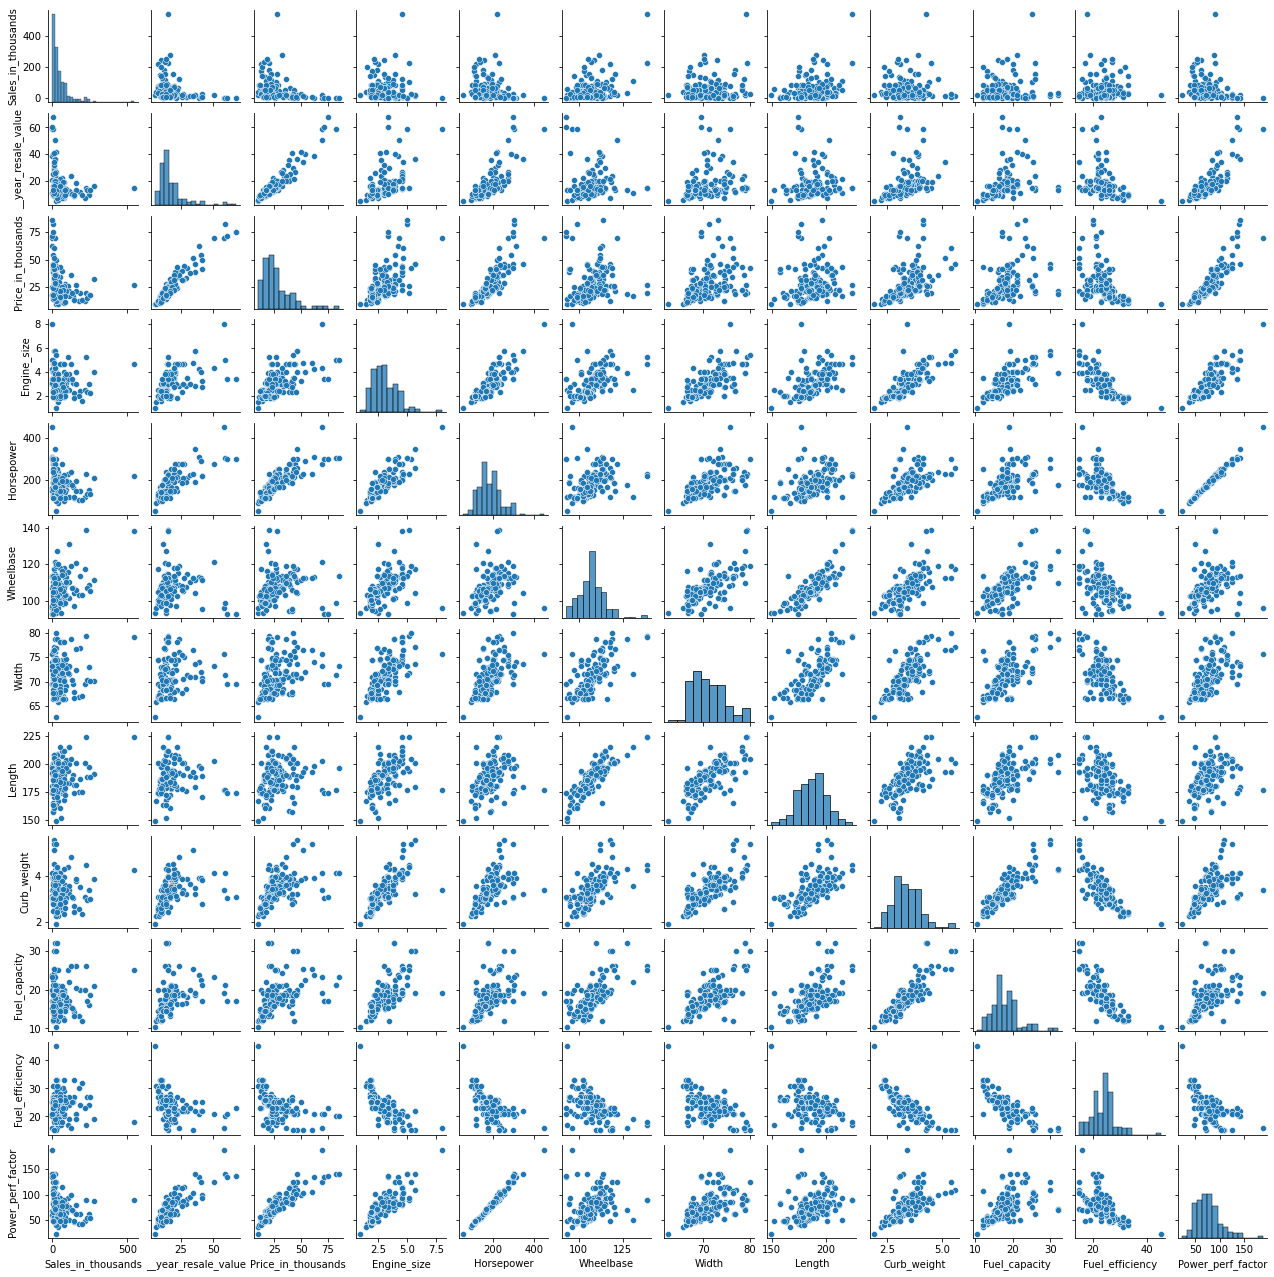

In [11]:
print("-----   The Pairplot Below Shows The Relationships Between Variables In Our Car Data ----------\n")
sns.pairplot(car_data, height=1.5 );

### Using Scatter Plot To Visualize The Relationship Between The Car Sales And Price In Thousand

---- The Scatter Plot Below Shows The Relationship Between The Car Sales And Price In Thousand



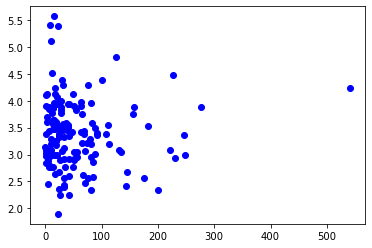

In [12]:
print("---- The Scatter Plot Below Shows The Relationship Between The Car Sales And Price In Thousand\n")
Sales_in_thousands = car_data.iloc[:,2]
Price_in_thousands = car_data.iloc[:,11]

plt.scatter(x = Sales_in_thousands, y = Price_in_thousands , c="blue");

## Outlier Detection

### Box Plot For Visualization Of Outliers In Our DataSet

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

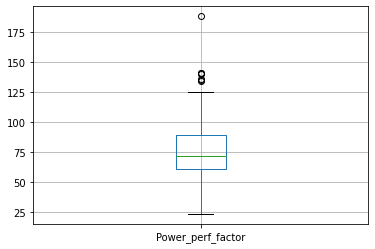

In [13]:
for Column in car_data:
    plt.figure();
car_data.boxplot([Column]);

### Heat Map To Visualize The Correlation Of Our Data

------------------   The Heat Map Below Shows The Correlation Of Our Car Data -------------



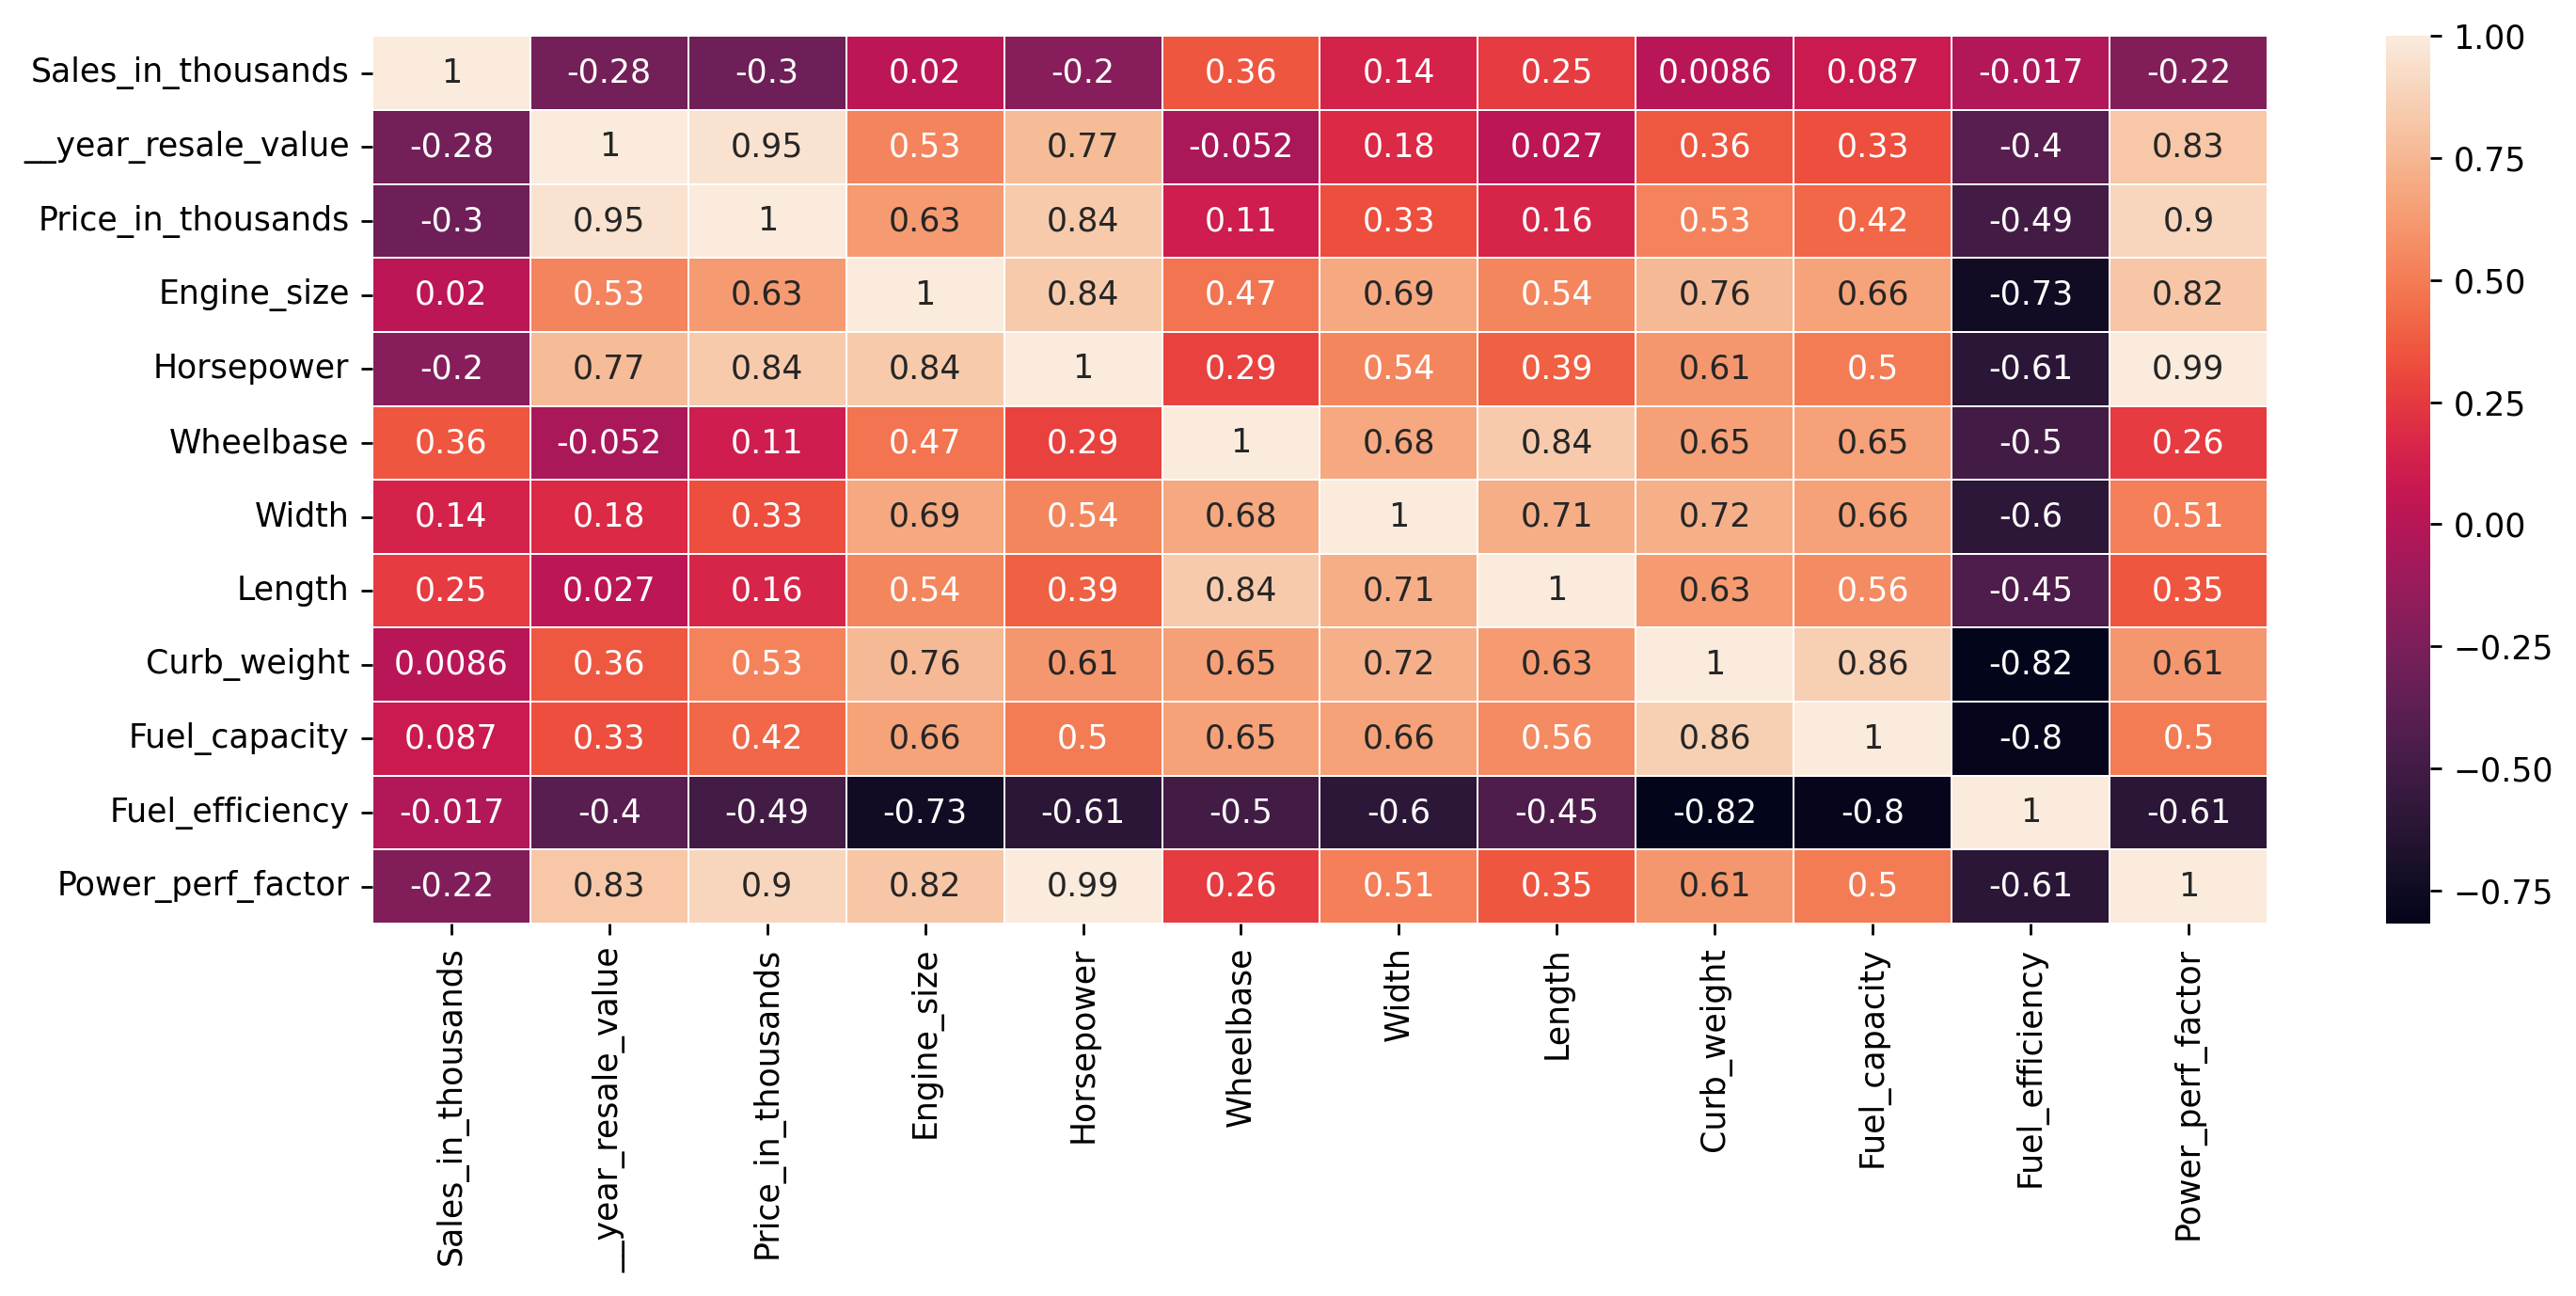

In [33]:
print("------------------   The Heat Map Below Shows The Correlation Of Our Car Data -------------\n")

sns.heatmap(car_data.corr(), annot =True, linewidths=.10)
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (13,5)
plt.show()

## <b style = "color: blue ">  INFERENCE FROM EDA AND DATA VISUALIZATION </b>

<b style = "color: blue">
<ul>
 <li>
There Are Null Values In 11 Columns Of Our Car Data Which Have To Be Fixed During Feature Imputation On Our Data Preprocessing Stage 
</li>
<li> Car Manufacturer, Model and Vehicle Type Columns are Labeled Data and we need to apply Label Encoding Technique to convert it to Numeric During Our Data Preprocessing Stage
</li>
<li>
 Latest_Launch Column has a mixed date Representation. We need to extract the day, Month and Year as a Feature During Our Feature Engineering Stage
</li>
<li>
Our Car Sales In Thousand, Year resale Value,Price in Thousand, HorsePower,Width, And Power Performance Factors Are Positively Skewed- Meaning That They Will Be Frequent Small Loses And Few Large Gains In The Car
</li>
<li>
Our Car Engine size, Wheelbase, Length, Curb Weight, and Fuel Capacity Has No Skew- Meaning That they are Normally Distributed 
</li>
<li>
We Noticed That The Car Fuel Efficiency Is Negatively Skewed - This Will Make The Car Price Move In Opposite Direction    
</li>
<li>
Our Car Data Are Mostly Float Data Except Car Manufacturer Column, Model Column, Vehicle Type Column , And Latest Launch Column Which are Object And Will Be Worked On During Our Feature Engineering Stage   
</li>
<li>
The Car Power Performance Factor Has an Hidden Outlier    
</li>    </ul></b>

# Stage 3.  <b style = "color:blue"> Data PreProcessing </b>

## Feature Imputation

In [43]:
car_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


#### Filling The Missing Values

In [44]:
car_data = car_data.interpolate()
car_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,35.20,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,91.380278
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


#### Confirming The Removal Of Null Values

In [45]:
car_data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

## Feature Engineering

#### Splitting the Datelike Stamp Into Features Like Year

In [46]:
#Convert to datetime type
car_data.Latest_Launch = pd.to_datetime(car_data.Latest_Launch)

In [47]:
#Splitting the datelike stamp into features like year
car_data['Launch_Year'] = car_data['Latest_Launch'].dt.year
car_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Launch_Year
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011
2,Acura,CL,14.114,18.225,Passenger,35.20,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,91.380278,2012
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011


#### Removing the Latest_Launch Column and Replacing It with Launch_Year

In [48]:
# Remove Latest Launch Column
car_data.drop('Latest_Launch',axis=1,inplace=True)
car_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Launch_Year
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011
2,Acura,CL,14.114,18.225,Passenger,35.20,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,91.380278,2012
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011


## Feature Encoding

### Label Encoding

#### Checking The Distribution Of The Categorical Data

In [49]:
#Distribution of the categorical data
print(car_data['Vehicle_type'].value_counts())

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64


####  Perfoming Label Encoding On The Categorical Data

In [50]:
#Encoding the Vehicle_type Column
car_data.replace({'Vehicle_type': {'Passenger':0,'Car':1}},inplace=True)
print(car_data['Vehicle_type'].value_counts())

0    116
1     41
Name: Vehicle_type, dtype: int64


#### Lets Review The First 5 Rows Of Our Data To See Our Changes

In [51]:
car_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Launch_Year
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012
1,Acura,TL,39.384,19.875,0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011
2,Acura,CL,14.114,18.225,0,35.20,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,91.380278,2012
3,Acura,RL,8.588,29.725,0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011
4,Audi,A4,20.397,22.255,0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011


###  Lets Rename and Clean The Car data Column

In [52]:
#Cleaning some column names
car_data.rename(columns={'Sales_in_thousands':'Sales','__year_resale_value':'Resale_Value','Price_in_thousands':'Price','Power_perf_factor':'Power Performance'},inplace=True)
car_data.head()

,Manufacturer,Model,Sales,Resale_Value,Vehicle_type,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power Performance,Launch_Year
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012
1,Acura,TL,39.384,19.875,0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011
2,Acura,CL,14.114,18.225,0,35.20,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,91.380278,2012
3,Acura,RL,8.588,29.725,0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011
4,Audi,A4,20.397,22.255,0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011


#### Since Manufacturer and Model Column Has No much Correlation On the Car Data We will Drop Them

In [53]:
#Cleaned data set ready for regression
Cleaned_data = car_data.drop(["Manufacturer","Model"],axis=1)
Cleaned_data.head()

,Sales,Resale_Value,Vehicle_type,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power Performance,Launch_Year
0,16.919,16.360,0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012
1,39.384,19.875,0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011
2,14.114,18.225,0,35.20,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,91.380278,2012
3,8.588,29.725,0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011
4,20.397,22.255,0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011


# Stage 4.  <b style = "color:blue"> Data Splitting </b>

### Train Model On Data

### Seperating Our Features From Target 

#### Lets Build X and y for Train

In [55]:
X = Cleaned_data.drop("Price",axis=1) # This is Our Feature
y = Cleaned_data["Price"]             # This is Our Target

#### Comparing The Shape Of Our Feature And Target

In [57]:
X.shape, y.shape

((157, 13), (157,))

## Cross Validation

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [90]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [91]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.998518,{'normalize': True}
1,lasso,0.995146,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.799236,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### Notice That Linear Regression Is The best Performing model, so we will use it for our training

### Lets Create A Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Applying Train Test Split Method

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Checking The Shape Of Our Train Data

In [64]:
print("------ Here 80% Of Our Data Is Used For Training And 20% Of Our Data For Testing -------\n")
X.shape, X_train.shape, X_test.shape

------ Here 80% Of Our Data Is Used For Training And 20% Of Our Data For Testing -------



((157, 13), (125, 13), (32, 13))

### Model Training

In [66]:
model = LinearRegression()
model

LinearRegression()

In [67]:
model.fit(X_train, y_train)

LinearRegression()

### Car Price Prediction

In [73]:
Car_Price_Prediction = model.predict(X_test)

## Predicting All Future Car Price 

In [74]:
Car_Price_Prediction

array([22.53606145, 24.52157369, 20.64257891, 10.84476032, 19.86306377,
       13.60197939, 22.05761466, 16.30203821, 31.91508738, 82.48220657,
       12.39134304, 21.58592045, 20.24601692, 20.1961904 , 21.97529399,
       21.22364906, 24.05307821, 17.76716122, 15.34755771, 46.63562607,
       21.61173215, 27.96205496, 22.49862998, 17.41948528, 26.4749645 ,
       16.58882065, 21.0315413 , 11.9208375 , 13.15476434,  9.76950345,
       25.22601571, 46.00219845])

In [107]:
Car_Price = pd.DataFrame(Car_Price_Prediction, columns = ["Future_Car_Price Predictions"])
Car_Price

,Future_Car_Price Predictions
0,22.536061
1,24.521574
2,20.642579
3,10.844760
4,19.863064
5,13.601979
6,22.057615
7,16.302038
8,31.915087
9,82.482207


In [96]:
X.columns

Index(['Sales', 'Resale_Value', 'Vehicle_type', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power Performance', 'Launch_Year'],
      dtype='object')

In [106]:
def predict_price(location,Sales, Resale_Value, Vehicle_type):    
    loc_index = np.where(X.columns ==location)[0][0]

    X = np.zeros(len(X.columns))
    X[0] = Sales
    X[1] = Resale_Value
    X[2] = Vehicle_type
    if loc_index >= 0:
        X[loc_index] = 1

    return model.predict([X])[0]
Car_Price_Prediction[0]
#predict_price(16.919,16.360,0,1.8)

22.53606145064674

# Stage 5.  <b style = "color:blue"> Analysis And Evaluation </b>

### Model Accuracy Test

In [70]:
model.score(X_test, y_test)

0.9998396653132413

### Observe From the Accuracy Test That Our Model Is 99% Accurate And Perform Very well

In [81]:
X.columns

Index(['Sales', 'Resale_Value', 'Vehicle_type', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power Performance', 'Launch_Year'],
      dtype='object')

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [92]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.99982588, 0.99985927, 0.99303121, 0.99995013, 0.99992271])

# <b style = "color: blue"> Code Implementation Completed </b>